## <span style="color:blue">  Numerical exercises 6</span>

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [92]:
plt.rcParams.update({'font.size': 15})

I will show simulation for the measured quantitities using Metropolis and Gibbs at temperature 0.5 i used 50 blocks of 10k steps each

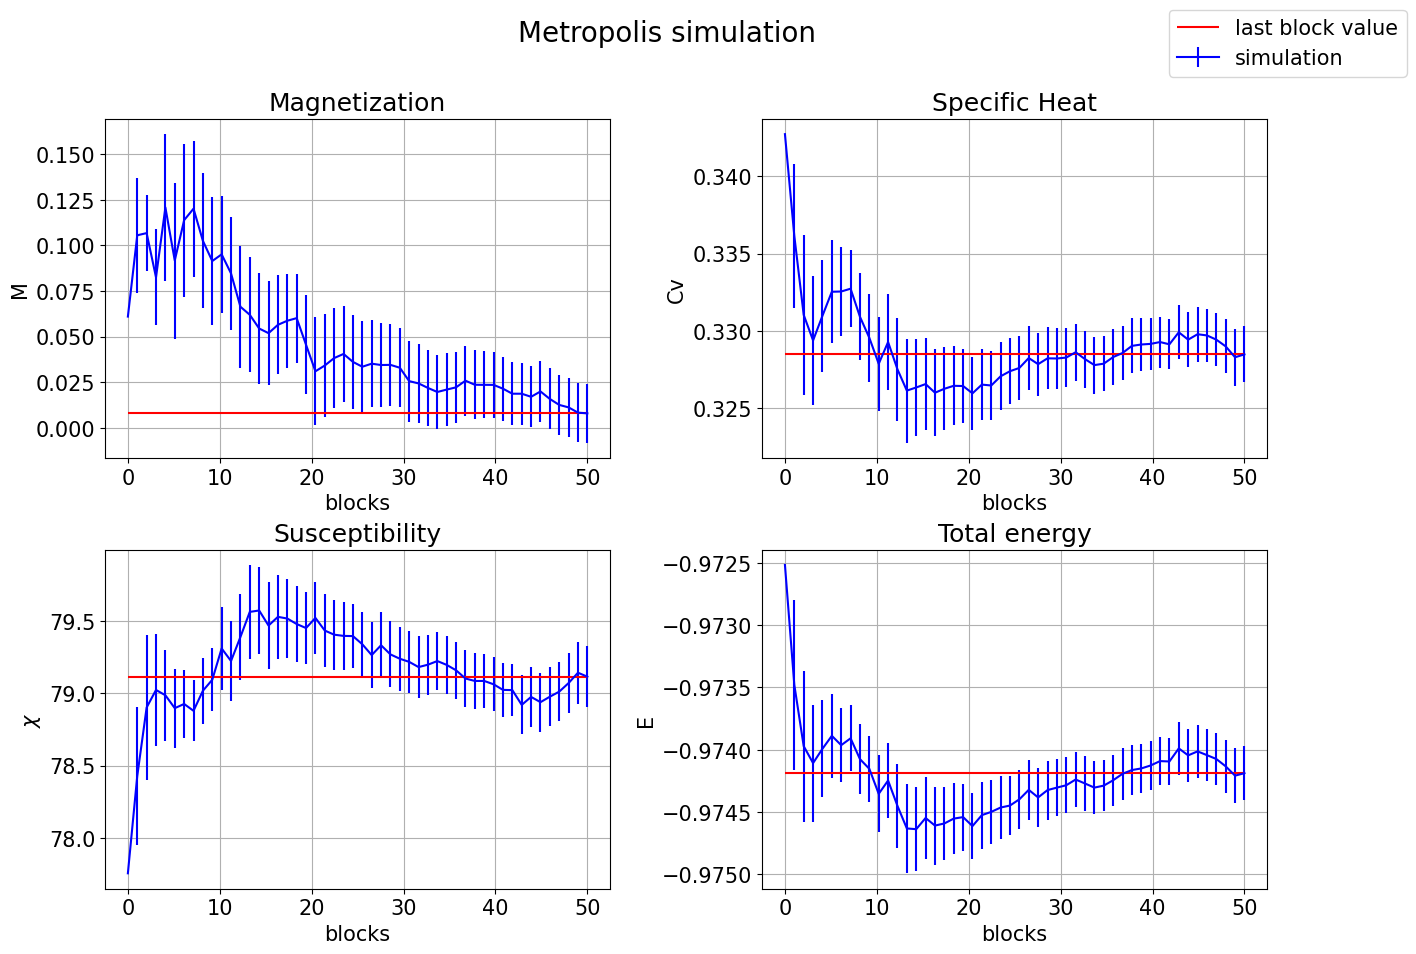

In [93]:
N = 50 #blocchi da 10k steps
x = np.linspace(0,N,N)
fig, axs = plt.subplots(2,2, figsize = (15,10) )
fig.suptitle("Metropolis simulation", fontsize = (20))

magn, error_magn   = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/magnetization.dat0.500000",         usecols=(2,3), unpack = 'true')
cv, error_cv       = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/specific_heat.dat0.500000",   usecols=(2,3), unpack = 'true')
chi, error_chi     = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/susceptibility.dat0.500000", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/total_energy.dat0.500000",     usecols=(2,3), unpack = 'true')

plt.subplot(2,2,1)
plt.errorbar(x,magn,yerr=error_magn, label = "simulation", color = "blue")
plt.title("Magnetization")
plt.xlabel("blocks")
plt.ylabel("M")
plt.hlines(magn[-1] ,0 ,N, color = "red" , label = "last block value") 
plt.grid(True)

plt.subplot(2,2,2)
plt.errorbar(x,cv,yerr=error_cv, color = "blue")
plt.title("Specific Heat")
plt.xlabel("blocks")
plt.ylabel("Cv")
plt.hlines(cv[-1] ,0 ,N, color = "red" )
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x,chi,yerr=error_chi, color = "blue")
plt.title("Susceptibility")
plt.xlabel("blocks")
plt.ylabel(r"$\chi$")
plt.hlines(chi[-1] ,0 ,N, color = "red" ) 
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(x,etot,yerr=error_etot, color = "blue" )
plt.title("Total energy")
plt.xlabel("blocks")
plt.ylabel("E")
plt.hlines(etot[-1] ,0 ,N, color = "red" ) 
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.27)

fig.legend( fontsize = 15)

plt.show()

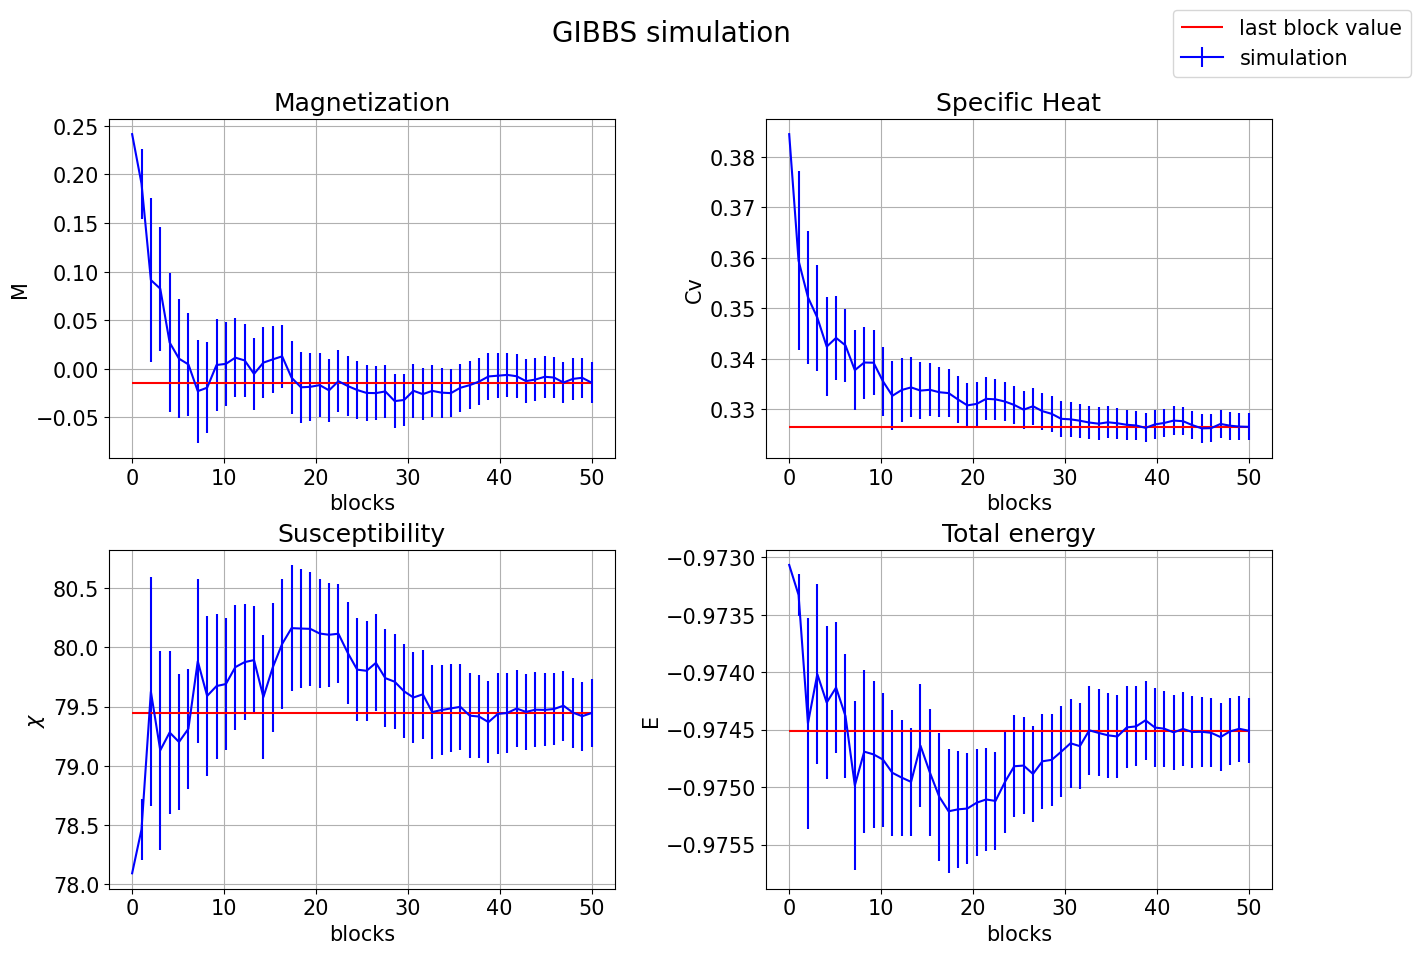

In [94]:
N = 50 #blocchi da 10k steps
x = np.linspace(0,N,N)
fig, axs = plt.subplots(2,2, figsize = (15,10) )
fig.suptitle("GIBBS simulation", fontsize = (20))

magn, error_magn   = np.loadtxt("../c++/es 6/OUTPUT/h=0/gibbs/magnetization.dat0.500000",         usecols=(2,3), unpack = 'true')
cv, error_cv       = np.loadtxt("../c++/es 6/OUTPUT/h=0/gibbs/specific_heat.dat0.500000",   usecols=(2,3), unpack = 'true')
chi, error_chi     = np.loadtxt("../c++/es 6/OUTPUT/h=0/gibbs/susceptibility.dat0.500000", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("../c++/es 6/OUTPUT/h=0/gibbs/total_energy.dat0.500000",     usecols=(2,3), unpack = 'true')

plt.subplot(2,2,1)
plt.errorbar(x,magn,yerr=error_magn, label = "simulation", color = "blue")
plt.title("Magnetization")
plt.xlabel("blocks")
plt.ylabel("M")
plt.hlines(magn[-1] ,0 ,N, color = "red" , label = "last block value") 
plt.grid(True)

plt.subplot(2,2,2)
plt.errorbar(x,cv,yerr=error_cv, color = "blue")
plt.title("Specific Heat")
plt.xlabel("blocks")
plt.ylabel("Cv")
plt.hlines(cv[-1] ,0 ,N, color = "red" )
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x,chi,yerr=error_chi, color = "blue")
plt.title("Susceptibility")
plt.xlabel("blocks")
plt.ylabel(r"$\chi$")
plt.hlines(chi[-1] ,0 ,N, color = "red" ) 
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(x,etot,yerr=error_etot, color = "blue" )
plt.title("Total energy")
plt.xlabel("blocks")
plt.ylabel("E")
plt.hlines(etot[-1] ,0 ,N, color = "red" ) 
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.27)

fig.legend( fontsize = 15)

plt.show()

- Now i take 15 temperatures equispaced in the range [0.5,2] and make a simulation with data blocking method
- In the plot i will show how the measured quantities follow the theoretical curve in function of increasing T

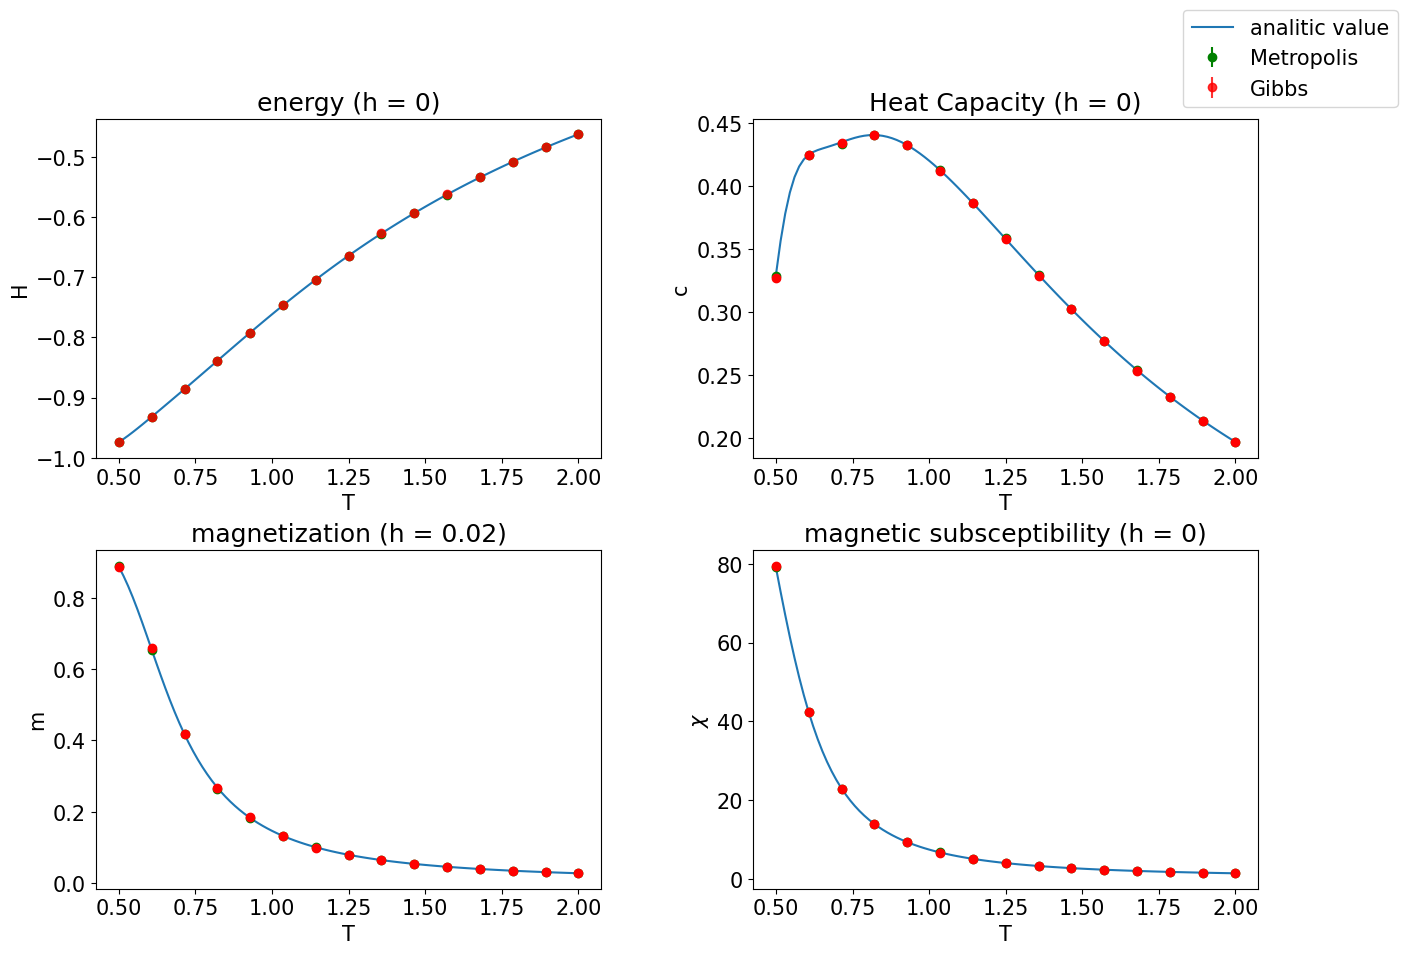

In [95]:
T = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/total_energy(T).dat", usecols=(4), unpack = 'true')
fig, axs = plt.subplots(2,2, figsize = (15,10) )

ene, error_ene    = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/total_energy(T).dat", usecols=(2,3), unpack = 'true')
heat, error_heat  = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/specific_heat(T).dat", usecols=(2,3), unpack = 'true')
#heat, error_heat  = np.loadtxt("../c++/es 6/OUTPUT/specific_heat(T).dat", usecols=(2,3), unpack = 'true')
mag, error_mag    = np.loadtxt("../c++/es 6/OUTPUT/h=0.02/metro/magnetization(T).dat", usecols=(2,3), unpack = 'true')
chi, error_chi    = np.loadtxt("../c++/es 6/OUTPUT/h=0/metro/susceptibility(T).dat", usecols=(2,3), unpack = 'true')

eneG, error_eneG    = np.loadtxt("../c++/es 6/OUTPUT/h=0/Gibbs/total_energy(T).dat", usecols=(2,3), unpack = 'true')
heatG, error_heatG  = np.loadtxt("../c++/es 6/OUTPUT/h=0/Gibbs/specific_heat(T).dat", usecols=(2,3), unpack = 'true')
#heatG, error_heatG  = np.loadtxt("../c++/es 6/OUTPUT/specific_heat(T).dat", usecols=(2,3), unpack = 'true')
magG, error_magG    = np.loadtxt("../c++/es 6/OUTPUT/h=0.02/Gibbs/magnetization(T).dat", usecols=(2,3), unpack = 'true')
chiG, error_chiG    = np.loadtxt("../c++/es 6/OUTPUT/h=0/Gibbs/susceptibility(T).dat", usecols=(2,3), unpack = 'true')

Te = np.linspace(0.5,2.0,num=100)
b = 1/Te
J = 1.0
Ns = 50
th = np.tanh(J/Te)
thN= th**Ns
ch = 1/th


e = -J*( th + ch*thN )/( 1 + thN )
he=((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

h=0.02 #external field
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = b*np.exp(2*b*J)*(1-thN)/(1+thN)

axs[0,0].errorbar(T,ene,yerr=error_ene, fmt='go' , label = 'Metropolis')
axs[0,0].errorbar(T,eneG,yerr=error_eneG, fmt='ro' , label = "Gibbs" , alpha=0.8)
axs[0,0].plot(Te, e, label = "analitic value" )
axs[0,0].set_title("energy (h = 0)",fontsize = 18)
axs[0,0].set_xlabel("T",fontsize = 15)
axs[0,0].set_ylabel("H",fontsize = 15)
 
axs[0,1].errorbar(T,heat,yerr=error_heat, fmt='go' )
axs[0,1].errorbar(T,heatG,yerr=error_heatG, fmt='ro')
axs[0,1].plot(Te, he)
axs[0,1].set_title("Heat Capacity (h = 0)",fontsize = 18)
axs[0,1].set_xlabel("T",fontsize = 15)
axs[0,1].set_ylabel("c",fontsize = 15)

axs[1,0].errorbar(T,mag,yerr=error_mag, fmt='go'  )
axs[1,0].errorbar(T,magG,yerr=error_magG, fmt='ro' )
axs[1,0].plot(Te, M)
axs[1,0].set_title("magnetization (h = 0.02)",fontsize = 18)
axs[1,0].set_xlabel("T",fontsize = 15)
axs[1,0].set_ylabel("m",fontsize = 15)

axs[1,1].errorbar(T,chi,yerr=error_chi, fmt='go' )
axs[1,1].errorbar(T,chiG,yerr=error_chiG, fmt='ro')
axs[1,1].plot(Te, X)
axs[1,1].set_title("magnetic subsceptibility (h = 0)",fontsize = 18)
axs[1,1].set_xlabel("T",fontsize = 15)
axs[1,1].set_ylabel("$\chi$",fontsize = 15) 

plt.subplots_adjust(wspace=0.3, hspace=0.27)


fig.legend( fontsize = 15 )

plt.show()